# **Latar Belakang Masalah**
Kesehatan anak merupakan fondasi utama dalam membangun generasi yang kuat, produktif, dan berdaya saing tinggi di masa depan. Salah satu permasalahan gizi yang masih menjadi perhatian serius di Indonesia adalah stunting, yaitu kondisi gagal tumbuh pada anak yang disebabkan oleh kekurangan gizi kronis dalam jangka panjang. Anak yang mengalami stunting memiliki tinggi badan di bawah standar usianya, yang berdampak pada perkembangan kognitif, kemampuan belajar, produktivitas, serta risiko penyakit kronis di masa dewasa.

Kabupaten Temanggung merupakan salah satu wilayah di Jawa Tengah yang masih menghadapi tantangan stunting. Pemerintah daerah bersama lembaga kesehatan telah menjalankan berbagai program intervensi gizi untuk menekan angka stunting, namun upaya tersebut memerlukan dukungan analisis berbasis data yang komprehensif. Pendekatan ilmiah berbasis data memungkinkan identifikasi faktor risiko utama serta memberikan dasar kuat untuk perumusan kebijakan dan program intervensi gizi yang lebih tepat sasaran.

Dataset Data Anak Stunting Temanggung menjadi sumber penting dalam analisis ini karena mencakup berbagai variabel relevan seperti `jenis_kelamin`, `tanggal_lahir`, `tanggal_pengukuran`, `usia_bulan`, `tinggi_badan_cm`, `skor_z_haz`, `status_stunting`, `kecamatan`, dan `desa`. Melalui pemanfaatan data tersebut, dapat dilakukan kajian mendalam terhadap pola stunting serta pengembangan model prediksi status gizi anak.

Analisis ini diharapkan dapat memberikan kontribusi nyata bagi pengambil kebijakan dan sektor kesehatan masyarakat, khususnya dalam upaya menurunkan angka stunting di Kabupaten Temanggung.

# **Terkait Dataset**
- **Sumber Data**: [Data Anak Stunting Temanggung](https://drive.google.com/file/d/1bA5EG8FyAnOSseznKr8ftMZ7ClIvH6mz/view?usp=drive_link)
- **Jumlah Sampel Data**: 2.200 anak
- **Jumlah Atribut**: 12 kolom, meliputi: `jenis_kelamin`,`tanggal_lahir`,`tinggi_badan_cm`, dan lainnya.
- **Label**: `status_stunting` — kategori gizi anak (Stunting Ringan, Normal, Stunting Berat)
- **Tujuan Dataset**: Untuk menganalisis pravelensi stunting berdasarkan jenis kelamin, usia, dan lokasi (desa/kecamatan).

# **Pendekatan Analisis**
Analisis ini bertujuan untuk memahami prevalensi stunting di Kabupaten Temanggung dengan memanfaatkan variabel-variabel demografis dan antropometrik yang tersedia dalam dataset. Pendekatan dilakukan melalui tahapan berikut:
1. Pemuatan dan Eksplorasi Data: Memuat dataset, meninjau struktur kolom, serta memeriksa distribusi awal data dan potensi data anomali.
2. Pra-pemrosesan Data: Menangani nilai yang hilang, menormalkan format tanggal, serta menurunkan atribut turunan seperti usia dalam bulan.
3. Analisis Deskriptif: Menghitung prevalensi stunting berdasarkan jenis kelamin, kelompok usia, dan lokasi (desa/kecamatan).
4. Analisis Hubungan: Mengevaluasi keterkaitan antara variabel demografis dan fisik dengan status stunting.
5. Visualisasi Data: Membuat grafik dan chart untuk memperjelas hasil analisis, seperti perbandingan jenis kelamin, distribusi usia, dan peta sebaran stunting.
6. Interpretasi Hasil: Menyimpulkan temuan utama beserta implikasinya terhadap kebijakan gizi daerah.
7. Rekomendasi: Menyusun langkah strategis berbasis data untuk program penurunan angka stunting.



# **Import Data**



In [ ]:
import pandas as pd //manipulasi data 
import numpy as np //operasi numerik
import matplotlib.pyplot as plt //visualisasi data
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings //menyembunyikan pesan peringatan agar output lebih bersih
warnings.filterwarnings("ignore")

# **Memuat Data-Set**

In [ ]:
# Memuat Dataseset
df=pd.read_csv('/content/data_anak_stunting_temanggung.csv')
print("==== 5 Baris Teratas Dataset ====")
print(df.head())

print("\n==== Ukuran Dataset ====")
print(f"Jumlah baris: {df.shape[0]} | Jumlah kolom: {df.shape[1]}")

==== 5 Baris Teratas Dataset ====
   id jenis_data id_anak jenis_kelamin tanggal_lahir tanggal_pengukuran  \
0   1       Anak   A0001     Perempuan     5/29/2025          10/1/2025   
1   2       Anak   A0002     Laki-laki     6/17/2024          10/1/2025   
2   3       Anak   A0003     Perempuan     9/12/2023          10/1/2025   
3   4       Anak   A0004     Laki-laki    10/17/2024          10/1/2025   
4   5       Anak   A0005     Laki-laki     4/29/2023          10/1/2025   

   usia_bulan  tinggi_badan_cm  skor_z_haz  status_stunting kecamatan  \
0         4.1             52.1       -2.32  Stunting Ringan  Gemawang   
1        15.5             79.5       -2.56  Stunting Ringan  Gemawang   
2        24.6            105.9       -0.73           Normal  Gemawang   
3        11.5             73.3        0.91           Normal  Gemawang   
4        29.1            113.2       -0.77           Normal  Gemawang   

        desa  
0  Tlogorejo  
1  Ngadisepi  
2     Losari  
3  Ngadisepi  
4

# **Exoloratory Data Analysis (EDA)**

In [ ]:
# Melihat ringkasan tipe data
print("\n==== Informasi Dataset ====")
print(df.info())


==== Informasi Dataset ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2200 non-null   int64  
 1   jenis_data          2200 non-null   object 
 2   id_anak             2200 non-null   object 
 3   jenis_kelamin       2200 non-null   object 
 4   tanggal_lahir       2200 non-null   object 
 5   tanggal_pengukuran  2200 non-null   object 
 6   usia_bulan          2200 non-null   float64
 7   tinggi_badan_cm     2200 non-null   float64
 8   skor_z_haz          2200 non-null   float64
 9   status_stunting     2200 non-null   object 
 10  kecamatan           2200 non-null   object 
 11  desa                2200 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 206.4+ KB
None


In [ ]:
# Pastikan numerik
for col in ['usia_bulan', 'tinggi_badan_cm', 'skor_z_haz']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
print("\n==== Jumlah Missing Value Di Dataset ====")
print(df.isna().sum())

print("\n==== Jumlah Data Duplikat ====")
print(df.duplicated().sum())


==== Jumlah Missing Value Di Dataset ====
id                    0
jenis_data            0
id_anak               0
jenis_kelamin         0
tanggal_lahir         0
tanggal_pengukuran    0
usia_bulan            0
tinggi_badan_cm       0
skor_z_haz            0
status_stunting       0
kecamatan             0
desa                  0
dtype: int64

==== Jumlah Data Duplikat ====
0


In [ ]:
# Hapus kolom tidak relevan
# - 'tanggal_lahir' dan 'tanggal_pengukuran' tidak digunakan karena usia_bulan sudah tersedia
# - 'id_anak' dan 'id' hanya identitas unik
# - 'jenis_data' jika hanya berisi satu kategori ("Anak")

drop_cols = ['id', 'id_anak', 'jenis_data', 'tanggal_lahir', 'tanggal_pengukuran']
existing_drop = [c for c in drop_cols if c in df.columns]
if existing_drop:
    df = df.drop(columns=existing_drop)
    print(f"\nDihapus kolom: {existing_drop}")
print("Kolom tersisa:", df.columns.tolist())



Dihapus kolom: ['id', 'id_anak', 'jenis_data', 'tanggal_lahir', 'tanggal_pengukuran']
Kolom tersisa: ['jenis_kelamin', 'usia_bulan', 'tinggi_badan_cm', 'skor_z_haz', 'status_stunting', 'kecamatan', 'desa']


In [ ]:
# Periksa nilai unik dulu untuk menghindari typo
print("\nNilai unik jenis_kelamin:", df['jenis_kelamin'].unique())
print("Nilai unik status_stunting:", df['status_stunting'].unique())


Nilai unik jenis_kelamin: ['Perempuan' 'Laki-laki']
Nilai unik status_stunting: ['Stunting Ringan' 'Normal' 'Stunting Berat']


In [ ]:
# Mapping ke nilai numerik
df['jenis_kelamin_num'] = df['jenis_kelamin'].map({'Laki-laki': 1, 'Perempuan': 0})
if df['jenis_kelamin_num'].isna().any():
    print("Peringatan: Ada nilai jenis_kelamin yang tidak ter-mapping:", df.loc[df['jenis_kelamin_num'].isna(), 'jenis_kelamin'].unique())

df['status_stunting_num'] = df['status_stunting'].map({
    'Normal': 0,
    'Stunting Ringan': 1,
    'Stunting Berat': 2
})
if df['status_stunting_num'].isna().any():
    print("Peringatan: Ada nilai status_stunting yang tidak ter-mapping:", df.loc[df['status_stunting_num'].isna(), 'status_stunting'].unique())

In [ ]:
# Menampilkan ringkasan statistik deskriptif untuk kolom numerik
print("\n==== Ringkasan Statistik Deskriptif ====")
print(df.describe())


==== Ringkasan Statistik Deskriptif ====
        usia_bulan  tinggi_badan_cm   skor_z_haz  jenis_kelamin_num  \
count  2200.000000      2200.000000  2200.000000        2200.000000   
mean     29.701591        92.640091    -0.980214           0.489091   
std      17.403160        16.958889     1.268323           0.499995   
min       0.000000        45.300000    -4.970000           0.000000   
25%      15.000000        81.800000    -1.850000           0.000000   
50%      30.000000        93.100000    -0.960000           0.000000   
75%      45.000000       103.700000    -0.120000           1.000000   
max      60.000000       155.900000     3.130000           1.000000   

       status_stunting_num  
count          2200.000000  
mean              0.266818  
std               0.547173  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               2.000000  


In [ ]:
# Distribusi Kategori
print("\n==== Distribusi Jenis Kelamin ====")
print(df['jenis_kelamin'].value_counts())

print("\n==== Distribusi Status Stunting ====")
print(df['status_stunting'].value_counts())

print("\n==== Distribusi Kecamatan ====")
print(df['kecamatan'].value_counts())


==== Distribusi Jenis Kelamin ====
jenis_kelamin
Perempuan    1124
Laki-laki    1076
Name: count, dtype: int64

==== Distribusi Status Stunting ====
status_stunting
Normal             1727
Stunting Ringan     359
Stunting Berat      114
Name: count, dtype: int64

==== Distribusi Kecamatan ====
kecamatan
Gemawang       336
Ngadirejo      145
Temanggung     136
Candiroto      135
Jumo           135
Tlogomulyo     130
Kranggan       128
Kaloran        126
Kandangan      125
Tretep         123
Parakan        118
Pringsurat     115
Kedu           114
Selopampang    114
Bulu           113
Tembarak       107
Name: count, dtype: int64


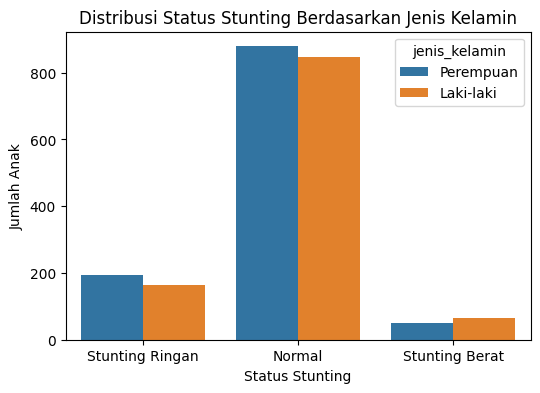

In [ ]:
# Distribusi Status Stunting berdasarkan jenis kelamin
plt.figure(figsize=(6,4))
sns.countplot(x='status_stunting', hue='jenis_kelamin', data=df)
plt.title('Distribusi Status Stunting Berdasarkan Jenis Kelamin')
plt.xlabel('Status Stunting')
plt.ylabel('Jumlah Anak')
plt.show()

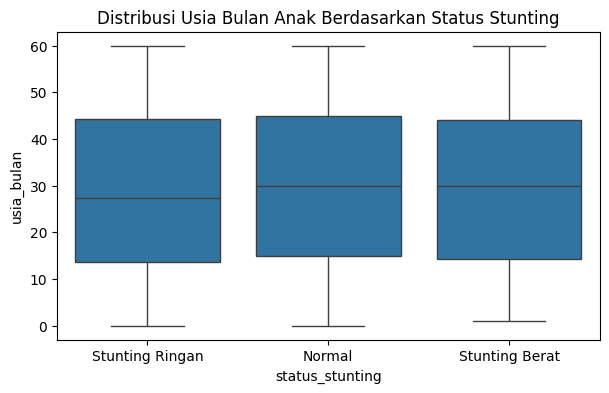

In [ ]:
# Distribusi usia terhadap status stunting
plt.figure(figsize=(7,4))
sns.boxplot(x='status_stunting', y='usia_bulan', data=df)
plt.title('Distribusi Usia Bulan Anak Berdasarkan Status Stunting')
plt.show()

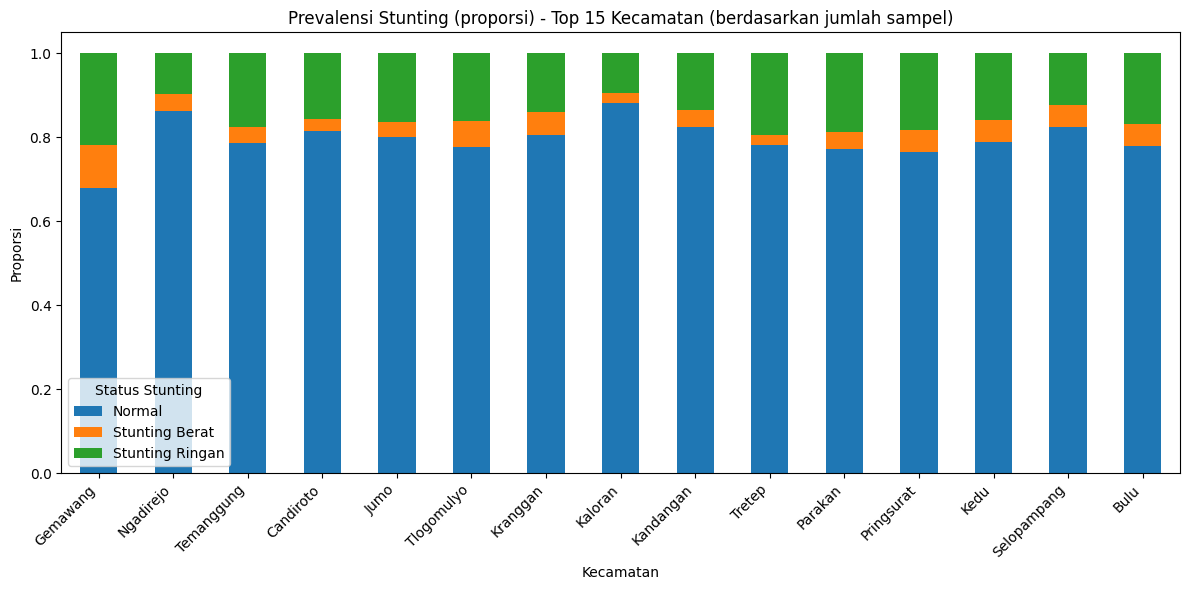

In [ ]:
# Hitung proporsi tiap kelas per kecamatan (stacked)
prov = df.groupby('kecamatan')['status_stunting'].value_counts(normalize=True).unstack().fillna(0)
# Opsi: tampilkan top 15 kecamatan berdasarkan jumlah sampel
counts = df['kecamatan'].value_counts()
top_kec = counts.head(15).index
prov.loc[top_kec].plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Prevalensi Stunting (proporsi) - Top 15 Kecamatan (berdasarkan jumlah sampel)')
plt.xlabel('Kecamatan')
plt.ylabel('Proporsi')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status Stunting')
plt.tight_layout()
plt.show()

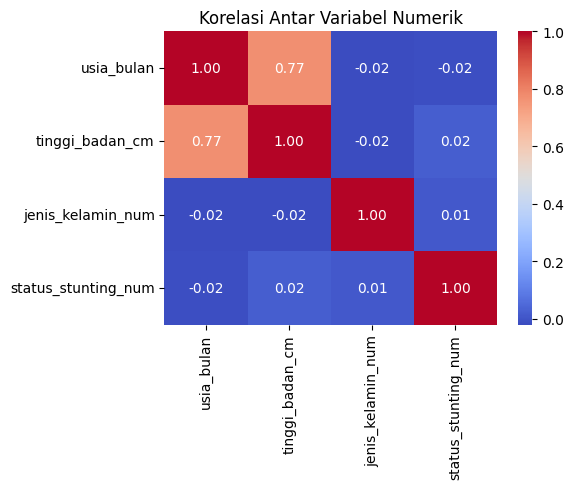

In [ ]:
plt.figure(figsize=(6,5))
corr = df[['usia_bulan','tinggi_badan_cm','jenis_kelamin_num','status_stunting_num']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.tight_layout()
plt.show()

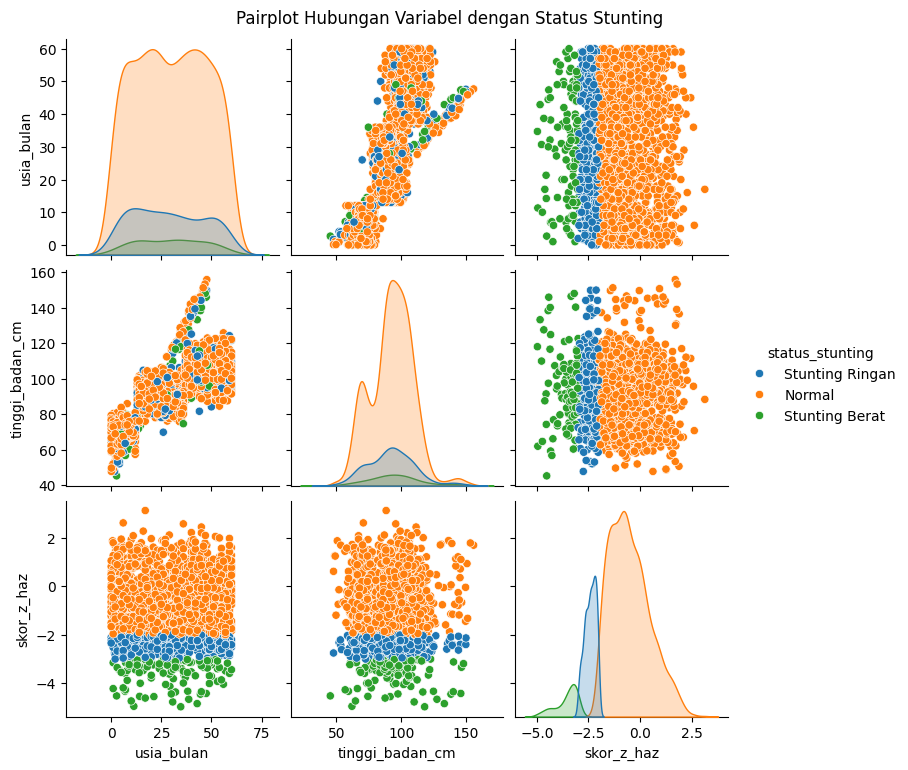

In [ ]:
sns.pairplot(df, hue='status_stunting', vars=['usia_bulan', 'tinggi_badan_cm', 'skor_z_haz'])
plt.suptitle('Pairplot Hubungan Variabel dengan Status Stunting', y=1.02)
plt.show()

In [ ]:
# Deteksi outlier (IQR) untuk skor_z_haz & tinggi_badan_cm =======
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return low, high

# Skor Z-HAZ
low_z, high_z = detect_outliers_iqr(df['skor_z_haz'])
outlier_z = df[(df['skor_z_haz'] < low_z) | (df['skor_z_haz'] > high_z)]
print("\nSkor Z-HAZ outliers:", len(outlier_z))
display(outlier_z.head(5))

# Tinggi badan
low_h, high_h = detect_outliers_iqr(df['tinggi_badan_cm'])
outlier_h = df[(df['tinggi_badan_cm'] < low_h) | (df['tinggi_badan_cm'] > high_h)]
print("\nTinggi badan outliers:", len(outlier_h))
display(outlier_h.head(5))


Skor Z-HAZ outliers: 14


,jenis_kelamin,usia_bulan,tinggi_badan_cm,skor_z_haz,status_stunting,kecamatan,desa,jenis_kelamin_num,status_stunting_num
8,Laki-laki,2.7,45.3,-4.52,Stunting Berat,Gemawang,Pagersari,1,2
59,Laki-laki,42.9,133.3,-4.84,Stunting Berat,Gemawang,Ngadisepi,1,2
63,Laki-laki,11.3,62.0,-4.95,Stunting Berat,Gemawang,Losari,1,2
70,Laki-laki,14.2,74.3,-4.54,Stunting Berat,Gemawang,Pagersari,1,2
105,Laki-laki,38.7,127.6,-4.66,Stunting Berat,Gemawang,Ngampel,1,2



Tinggi badan outliers: 46


,jenis_kelamin,usia_bulan,tinggi_badan_cm,skor_z_haz,status_stunting,kecamatan,desa,jenis_kelamin_num,status_stunting_num
5,Laki-laki,40.2,138.3,-1.14,Normal,Gemawang,Tlogorejo,1,0
8,Laki-laki,2.7,45.3,-4.52,Stunting Berat,Gemawang,Pagersari,1,2
14,Laki-laki,44.0,140.4,-3.12,Stunting Berat,Gemawang,Tlogorejo,1,2
16,Laki-laki,1.1,48.7,1.26,Normal,Gemawang,Ngampel,1,0
17,Perempuan,44.6,146.7,-0.66,Normal,Gemawang,Pagersari,0,0


In [ ]:
# Simpan dataframe bersih untuk tahap selanjutnya =======
df_clean = df.copy()
# df_clean.to_csv('stunting_temanggung_clean.csv', index=False)
print("\nEDA Selesai. df_clean siap untuk Data Processing / Modeling.")


EDA Selesai. df_clean siap untuk Data Processing / Modeling.


# **Data Processing**

In [ ]:
df_proc = df_clean.copy()

In [ ]:
# Tangani missing value jika masih ada (numerik -> mean, kategorik -> modus)
num_cols = ['usia_bulan', 'tinggi_badan_cm', 'skor_z_haz']
cat_cols = ['jenis_kelamin', 'kecamatan', 'desa']


In [ ]:
# a. Encode 'jenis_kelamin' menjadi angka 0 dan 1
# Kode Anda sudah baik, ini hanya versi yang lebih ringkas.
df_proc['jenis_kelamin'] = df_proc['jenis_kelamin'].map({'Laki-laki': 1, 'Perempuan': 0})
print("\nFitur 'jenis_kelamin' telah di-encode (Laki-laki: 1, Perempuan: 0).")

# b. Hapus fitur 'desa' karena memiliki terlalu banyak kategori unik (high cardinality)
df_proc = df_proc.drop(columns=['desa'])
print("Fitur 'desa' telah dihapus.")

# c. One-Hot Encode 'kecamatan' (Top 20)
# Ini adalah pendekatan yang baik dan kita pertahankan.
top_k = 20
top_kecamatan = df_proc['kecamatan'].value_counts().nlargest(top_k).index
df_proc['kecamatan'] = df_proc['kecamatan'].where(df_proc['kecamatan'].isin(top_kecamatan), 'Lainnya')
df_proc = pd.get_dummies(df_proc, columns=['kecamatan'], prefix='kec', drop_first=True)
print(f"Fitur 'kecamatan' telah di-OneHotEncode untuk Top {top_k} kecamatan.")


Fitur 'jenis_kelamin' telah di-encode (Laki-laki: 1, Perempuan: 0).
Fitur 'desa' telah dihapus.
Fitur 'kecamatan' telah di-OneHotEncode untuk Top 20 kecamatan.


In [ ]:
# Menyiapkan Fitur (X) dan Target (y) TANPA KEBOCORAN DATA
print("\nMenyiapkan fitur (X) dan target (y) untuk permodelan...")

# a. Encoding Variabel Target
target_mapping = {'Normal': 0, 'Stunting Ringan': 1, 'Stunting Berat': 2}
df_proc['status_stunting'] = df_proc['status_stunting'].map(target_mapping)

# b. Membuat Fitur X (TANPA 'skor_z_haz' untuk menghindari kebocoran data)
# Ini adalah perubahan paling krusial.
X = df_proc.drop(columns=['status_stunting', 'skor_z_haz'])
y = df_proc['status_stunting']

print("\nFitur (X) yang akan digunakan untuk melatih model (prediksi realistis):")
print(X.columns.tolist())
print(f"\nUkuran X: {X.shape} | Ukuran y: {y.shape}")
print("\nData Processing Selesai. Data siap untuk di-split.")


Menyiapkan fitur (X) dan target (y) untuk permodelan...

Fitur (X) yang akan digunakan untuk melatih model (prediksi realistis):
['jenis_kelamin', 'usia_bulan', 'tinggi_badan_cm', 'jenis_kelamin_num', 'status_stunting_num', 'kec_Candiroto', 'kec_Gemawang', 'kec_Jumo', 'kec_Kaloran', 'kec_Kandangan', 'kec_Kedu', 'kec_Kranggan', 'kec_Ngadirejo', 'kec_Parakan', 'kec_Pringsurat', 'kec_Selopampang', 'kec_Temanggung', 'kec_Tembarak', 'kec_Tlogomulyo', 'kec_Tretep']

Ukuran X: (2200, 20) | Ukuran y: (2200,)

Data Processing Selesai. Data siap untuk di-split.


# **Splitting Data**

In [ ]:
# Split data (stratify agar proporsi kelas tetap)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Ukuran train:", X_train.shape, "Ukuran test:", X_test.shape)
print("Distribusi kelas (train):", np.bincount(y_train))
print("Distribusi kelas (test):", np.bincount(y_test))

Ukuran train: (1760, 20) Ukuran test: (440, 20)
Distribusi kelas (train): [1382  287   91]
Distribusi kelas (test): [345  72  23]


In [ ]:
# Simpan hasil preprocessing untuk tahap modeling
X_train_final = X_train.copy()
X_test_final = X_test.copy()
y_train_final = y_train.copy()
y_test_final = y_test.copy()

print("Data processing selesai. X_train_final siap untuk modeling.")

Data processing selesai. X_train_final siap untuk modeling.


# **Modelling**

In [ ]:
# Cek hasil data splitting
print("X_train_final:", X_train_final.shape)
print("X_test_final:", X_test_final.shape)
print("y_train_final:", y_train_final.shape)
print("y_test_final:", y_test_final.shape)

# Pastikan tidak ada missing value
print("\nJumlah missing value di X_train:", X_train_final.isna().sum().sum())
print("Jumlah missing value di X_test:", X_test_final.isna().sum().sum())

X_train_final: (1760, 20)
X_test_final: (440, 20)
y_train_final: (1760,)
y_test_final: (440,)

Jumlah missing value di X_train: 0
Jumlah missing value di X_test: 0


Random Forest

In [ ]:
rf_default = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_default.fit(X_train_final, y_train_final)

y_pred_rf_default = rf_default.predict(X_test_final)

print("=== Random Forest (Default) ===")
print("Accuracy :", accuracy_score(y_test_final, y_pred_rf_default))
print("F1-score :", f1_score(y_test_final, y_pred_rf_default, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred_rf_default))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_final, y_pred_rf_default))

# Evaluasi
print("Akurasi Training:", rf_default.score(X_train, y_train))
print("Akurasi Testing :", rf_default.score(X_test, y_test))

=== Random Forest (Default) ===
Accuracy : 1.0
F1-score : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        23

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440


Confusion Matrix:
 [[345   0   0]
 [  0  72   0]
 [  0   0  23]]
Akurasi Training: 1.0
Akurasi Testing : 1.0


Random Forest + Grid Search

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_final, y_train_final)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_rf_grid = best_rf.predict(X_test_final)

print("\n=== Random Forest (GridSearchCV) ===")
print("Accuracy :", accuracy_score(y_test_final, y_pred_rf_grid))
print("F1-score :", f1_score(y_test_final, y_pred_rf_grid, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred_rf_grid))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_final, y_pred_rf_grid))
print("Akurasi Training:", best_rf.score(X_train, y_train))
print("Akurasi Testing :", best_rf.score(X_test, y_test))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=== Random Forest (GridSearchCV) ===
Accuracy : 1.0
F1-score : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        23

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440


Confusion Matrix:
 [[345   0   0]
 [  0  72   0]
 [  0   0  23]]
Akurasi Training: 1.0
Akurasi Testing : 1.0


XGBoost

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)
xgb_model.fit(X_train_final, y_train_final)

y_pred_xgb = xgb_model.predict(X_test_final)

print("=== XGBoost ===")
print("Accuracy :", accuracy_score(y_test_final, y_pred_xgb))
print("F1-score :", f1_score(y_test_final, y_pred_xgb, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_final, y_pred_xgb))
print("Akurasi Training:", xgb_model.score(X_train, y_train))
print("Akurasi Testing :", xgb_model.score(X_test, y_test))

=== XGBoost ===
Accuracy : 1.0
F1-score : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        23

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440


Confusion Matrix:
 [[345   0   0]
 [  0  72   0]
 [  0   0  23]]
Akurasi Training: 1.0
Akurasi Testing : 1.0


Perbandingan semua model

In [ ]:
# Pastikan data split ada
required = ['X_train_final','X_test_final','y_train_final','y_test_final']
for v in required:
    if v not in globals():
        raise NameError(f"Variabel '{v}' tidak ditemukan. Pastikan split sudah dijalankan.")

Xtr, Xte = X_train_final, X_test_final
ytr, yte = y_train_final, y_test_final

# Pastikan models exist; jika tidak, buat & fit cepat (fallback)
models = {}

if 'rf_default' in globals():
    models['RF Default'] = rf_default
else:
    rf_default = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf_default.fit(Xtr, ytr)
    models['RF Default'] = rf_default

if 'best_rf' in globals():
    models['RF Grid'] = best_rf
else:
    # fallback: train a default RF as proxy for grid (will be overwritten if you run GridSearch earlier)
    rf_g = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf_g.fit(Xtr, ytr)
    models['RF Grid'] = rf_g

if 'xgb_model' in globals():
    models['XGBoost'] = xgb_model
else:
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)
    xgb_model.fit(Xtr, ytr)
    models['XGBoost'] = xgb_model

# Compute metrics
rows = []
for name, model in models.items():
    y_pred = model.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1_mac = f1_score(yte, y_pred, average='macro')
    f1_w = f1_score(yte, y_pred, average='weighted')
    prec = precision_score(yte, y_pred, average='weighted', zero_division=0)
    rec  = recall_score(yte, y_pred, average='weighted', zero_division=0)
    rows.append({
        'Model': name,
        'Accuracy': acc,
        'F1_macro': f1_mac,
        'F1_weighted': f1_w,
        'Precision_weighted': prec,
        'Recall_weighted': rec
    })

metrics_df = pd.DataFrame(rows).set_index('Model')
metrics_df = metrics_df[['Accuracy','F1_macro','F1_weighted','Precision_weighted','Recall_weighted']]
# Format as percentage for readability (optional)
metrics_df_pct = (metrics_df * 100).round(3)
print("=== Tabel Perbandingan Metrik (test set) ===")
display(metrics_df_pct)


=== Tabel Perbandingan Metrik (test set) ===


,Accuracy,F1_macro,F1_weighted,Precision_weighted,Recall_weighted
Model,,,,,
RF Default,100.0,100.0,100.0,100.0,100.0
RF Grid,100.0,100.0,100.0,100.0,100.0
XGBoost,100.0,100.0,100.0,100.0,100.0


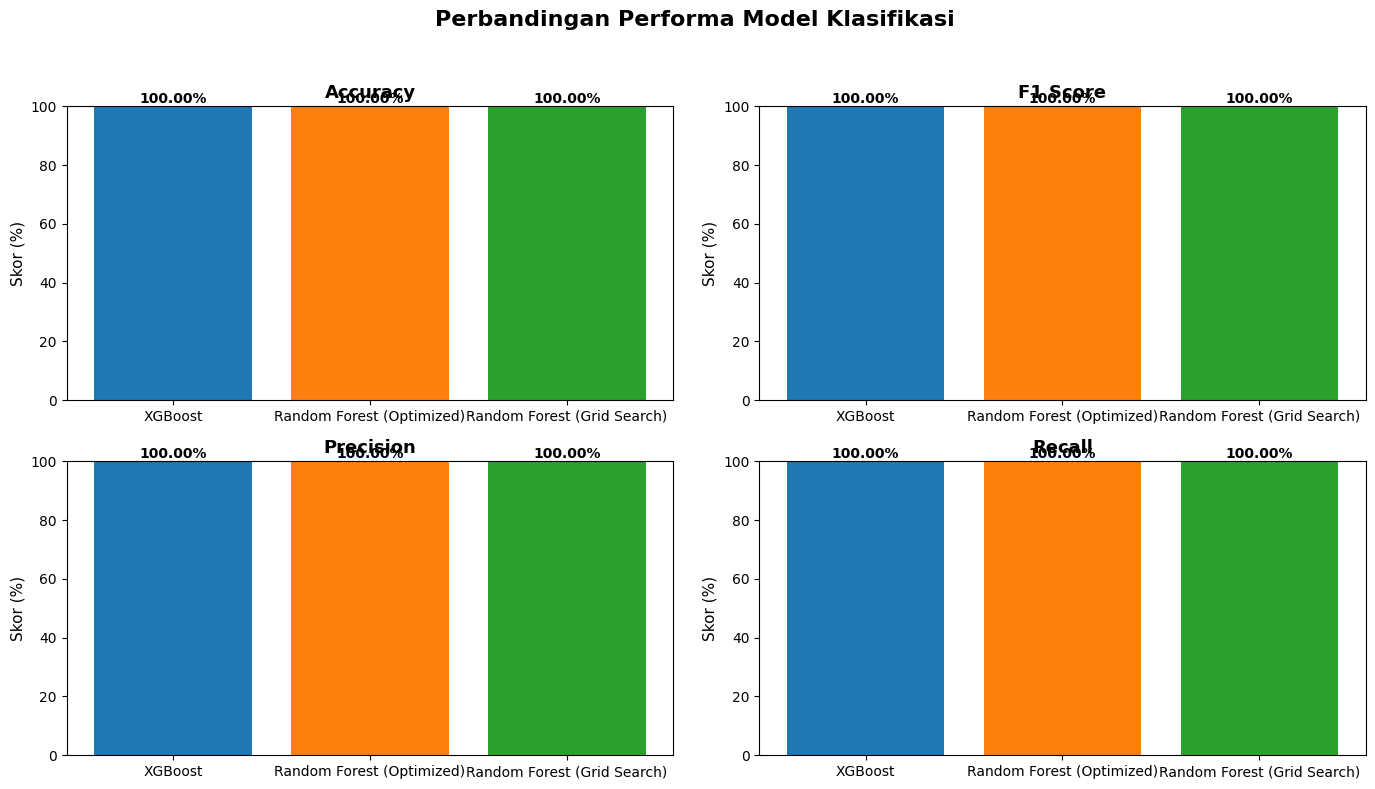

In [ ]:
# Perbandingan Performa Model Klasifikasi (otomatis dari hasil evaluasi)
# Ambil skor dari hasil model
# Misalnya sudah punya prediksi:
# y_pred_xgb, y_pred_rf_opt, y_pred_rf_grid

# XGB
acc_xgb = accuracy_score(y_test_final, y_pred_xgb) * 100
f1_xgb = f1_score(y_test_final, y_pred_xgb, average='weighted') * 100
prec_xgb = precision_score(y_test_final, y_pred_xgb, average='weighted') * 100
rec_xgb = recall_score(y_test_final, y_pred_xgb, average='weighted') * 100

# Random Forest (Optimized)
acc_rf_opt = accuracy_score(y_test_final, y_pred_rf_default) * 100
f1_rf_opt = f1_score(y_test_final, y_pred_rf_default, average='weighted') * 100
prec_rf_opt = precision_score(y_test_final, y_pred_rf_default, average='weighted') * 100
rec_rf_opt = recall_score(y_test_final, y_pred_rf_default, average='weighted') * 100

# Random Forest (Grid Search)
acc_rf_grid = accuracy_score(y_test_final, y_pred_rf_grid) * 100
f1_rf_grid = f1_score(y_test_final, y_pred_rf_grid, average='weighted') * 100
prec_rf_grid = precision_score(y_test_final, y_pred_rf_grid, average='weighted') * 100
rec_rf_grid = recall_score(y_test_final, y_pred_rf_grid, average='weighted') * 100


# === Masukkan ke array untuk plotting ===
models = ['XGBoost', 'Random Forest (Optimized)', 'Random Forest (Grid Search)']

accuracy = [acc_xgb, acc_rf_opt, acc_rf_grid]
f1_scores = [f1_xgb, f1_rf_opt, f1_rf_grid]
precisions = [prec_xgb, prec_rf_opt, prec_rf_grid]
recalls = [rec_xgb, rec_rf_opt, rec_rf_grid]

# === Plot Bar Chart ===
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Perbandingan Performa Model Klasifikasi', fontsize=16, fontweight='bold')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Fungsi bantu buat setiap subplot
def plot_metric(ax, values, title):
    bars = ax.bar(models, values, color=colors)
    ax.set_ylim(0, 100)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_ylabel('Skor (%)', fontsize=11)
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.2f}%', ha='center', fontweight='bold')

# Buat semua subplot
plot_metric(axes[0, 0], accuracy, 'Accuracy')
plot_metric(axes[0, 1], f1_scores, 'F1 Score')
plot_metric(axes[1, 0], precisions, 'Precision')
plot_metric(axes[1, 1], recalls, 'Recall')

# Rapiin tampilan
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# Daftar model
models = ["XGBoost", "Random Forest (Default)", "Random Forest (Grid Search)"]

# Hitung akurasi training & testing masing-masing model
train_scores = [
    xgb_model.score(X_train, y_train) * 100,
    rf_default.score(X_train, y_train) * 100,
    best_rf.score(X_train, y_train) * 100
]

test_scores = [
    xgb_model.score(X_test, y_test) * 100,
    rf_default.score(X_test, y_test) * 100,
    best_rf.score(X_test, y_test) * 100
]

# Analisis overfitting untuk setiap model
print("🔍 Analisis Overfitting Tiap Model:\n" + "="*50)
for i, model in enumerate(models):
    selisih = train_scores[i] - test_scores[i]
    print(f"\n🔹 {model}")
    print(f"   Akurasi Training : {train_scores[i]:.2f}%")
    print(f"   Akurasi Testing  : {test_scores[i]:.2f}%")
    print(f"   Selisih          : {selisih:.2f}%")

    # Interpretasi hasil
    if selisih > 2:
        print("   ⚠️ Indikasi overfitting — model terlalu bagus di data latih tapi menurun di data uji.")
    elif selisih < -2:
        print("   ⚠️ Indikasi underfitting — model tidak cukup belajar dari data latih.")
    else:
        print("   ✅ Tidak overfitting — performa stabil antara data latih dan uji.")


🔍 Analisis Overfitting Tiap Model:

🔹 XGBoost
   Akurasi Training : 100.00%
   Akurasi Testing  : 100.00%
   Selisih          : 0.00%
   ✅ Tidak overfitting — performa stabil antara data latih dan uji.

🔹 Random Forest (Default)
   Akurasi Training : 100.00%
   Akurasi Testing  : 100.00%
   Selisih          : 0.00%
   ✅ Tidak overfitting — performa stabil antara data latih dan uji.

🔹 Random Forest (Grid Search)
   Akurasi Training : 100.00%
   Akurasi Testing  : 100.00%
   Selisih          : 0.00%
   ✅ Tidak overfitting — performa stabil antara data latih dan uji.


In [ ]:
# Konfigurasi
# Metric utama untuk pemilihan model: opsi: 'F1_weighted', 'Accuracy', 'F1_macro'
PRIMARY_METRIC = 'F1_weighted'

# Daftar model yang diharapkan (ganti nama jika kamu memakai nama berbeda)
expected_models = {
    'XGBoost': globals().get('xgb_model', None),
    'RandomForest_Default': globals().get('rf_default', None),
    'RandomForest_Grid': globals().get('best_rf', None)
}

# --- Validasi input ---
required = ['X_test_final','y_test_final']
for v in required:
    if v not in globals():
        raise NameError(f"Variabel '{v}' tidak ditemukan. Pastikan data split tersedia (X_test_final, y_test_final).")

Xte = X_test_final
yte = y_test_final

# Buat prediksi jika belum ada
preds = {}
for name, model in expected_models.items():
    if model is None:
        # skip model yang tidak ada
        continue
    # try existing prediction var names
    pred_var_name = f"y_pred_{name.lower()}"
    if pred_var_name in globals():
        preds[name] = globals()[pred_var_name]
    else:
        # buat prediksi dan simpan di dict
        try:
            preds[name] = model.predict(Xte)
        except Exception as e:
            print(f"Prediksi gagal untuk {name}: {e}")

if not preds:
    raise RuntimeError("Tidak ada model terdeteksi untuk dievaluasi. Pastikan xgb_model, rf_default, atau best_rf sudah dilatih.")

# --- Hitung metrik untuk setiap model ---
rows = []
for name, y_pred in preds.items():
    acc = accuracy_score(yte, y_pred)
    f1_w = f1_score(yte, y_pred, average='weighted')
    f1_m = f1_score(yte, y_pred, average='macro')
    prec_w = precision_score(yte, y_pred, average='weighted', zero_division=0)
    rec_w = recall_score(yte, y_pred, average='weighted', zero_division=0)
    rows.append({
        'Model': name,
        'Accuracy': acc,
        'F1_weighted': f1_w,
        'F1_macro': f1_m,
        'Precision_weighted': prec_w,
        'Recall_weighted': rec_w
    })

metrics_df = pd.DataFrame(rows).set_index('Model')
# show percentages
metrics_pct = (metrics_df * 100).round(3)

print("=== Tabel Metrik (test set) ===")
display(metrics_pct.sort_values(by=PRIMARY_METRIC, ascending=False))

# --- Rekomendasi model ---
# 1) Pilih model dengan primary metric tertinggi
best_by_primary = metrics_df[PRIMARY_METRIC].idxmax()
best_primary_value = metrics_df.loc[best_by_primary, PRIMARY_METRIC]

# 2) Tie-breaker: jika ada tie (sangat jarang di float), gunakan Accuracy sebagai secondary
ties = metrics_df[metrics_df[PRIMARY_METRIC] == best_primary_value]
if len(ties) > 1:
    best_by_secondary = ties['Accuracy'].idxmax()
    recommended = best_by_secondary
else:
    recommended = best_by_primary

# 3) Simpel preference: prefer simpler model if gap kecil (optional)
# Jika selisih PRIMARY_METRIC antar terbaik vs runner-up < 0.002 (0.2%), pilih model simpler (RandomForest_Default over XGBoost)
sorted_by_primary = metrics_df.sort_values(by=PRIMARY_METRIC, ascending=False)
if len(sorted_by_primary) > 1:
    gap = sorted_by_primary.iloc[0][PRIMARY_METRIC] - sorted_by_primary.iloc[1][PRIMARY_METRIC]
    if gap < 0.002:
        # prefer simpler model if available among top-2
        top2 = sorted_by_primary.index[:2].tolist()
        if 'RandomForest_Default' in top2:
            recommended = 'RandomForest_Default'

print("\n=== Rekomendasi Model ===")
print(f"Model yang direkomendasikan berdasarkan {PRIMARY_METRIC}: {recommended}")
print("Ringkasan metrik model terpilih (test set):")
display(metrics_pct.loc[[recommended]])

# Jika model terbaik punya feature importance, tampilkan
model_obj = expected_models.get(recommended, None)
if model_obj is not None:
    if hasattr(model_obj, "feature_importances_"):
        fi = model_obj.feature_importances_
        feat_names = Xte.columns if hasattr(Xte, "columns") else [f"f{i}" for i in range(len(fi))]
        fi_df = pd.DataFrame({'feature': feat_names, 'importance': fi}).sort_values('importance', ascending=False)
        print("\nTop 15 Feature Importance (model terpilih):")
        display(fi_df.head(15))
    elif hasattr(model_obj, "get_booster"):  # XGBoost raw booster, attempt to get importance
        try:
            booster = model_obj.get_booster()
            imp = booster.get_score(importance_type='weight')
            imp_df = pd.DataFrame(list(imp.items()), columns=['feature','importance']).sort_values('importance', ascending=False)
            print("\nFeature importance (XGBoost):")
            display(imp_df.head(15))
        except Exception:
            print("\nModel terpilih tidak menyediakan feature_importances_ secara langsung.")
    else:
        print("\nModel terpilih tidak menyediakan feature importances.")

# Simpan rekomendasi ke variabel untuk dipakai selanjutnya
recommended_model_name = recommended
recommended_metrics = metrics_df.loc[recommended].to_dict()

print("\nSelesai. Variabel 'recommended_model_name' dan 'recommended_metrics' tersedia untuk dipakai selanjutnya.")

=== Tabel Metrik (test set) ===


,Accuracy,F1_weighted,F1_macro,Precision_weighted,Recall_weighted
Model,,,,,
XGBoost,100.0,100.0,100.0,100.0,100.0
RandomForest_Default,100.0,100.0,100.0,100.0,100.0
RandomForest_Grid,100.0,100.0,100.0,100.0,100.0



=== Rekomendasi Model ===
Model yang direkomendasikan berdasarkan F1_weighted: RandomForest_Default
Ringkasan metrik model terpilih (test set):


,Accuracy,F1_weighted,F1_macro,Precision_weighted,Recall_weighted
Model,,,,,
RandomForest_Default,100.0,100.0,100.0,100.0,100.0



Top 15 Feature Importance (model terpilih):


,feature,importance
4,status_stunting_num,0.865986
2,tinggi_badan_cm,0.052559
1,usia_bulan,0.046435
6,kec_Gemawang,0.004750
3,jenis_kelamin_num,0.003563
0,jenis_kelamin,0.003516
11,kec_Kranggan,0.002305
15,kec_Selopampang,0.001917
14,kec_Pringsurat,0.001790
8,kec_Kaloran,0.001762



Selesai. Variabel 'recommended_model_name' dan 'recommended_metrics' tersedia untuk dipakai selanjutnya.


# **Kesimpulan**

Berdasarkan analisis yang telah dilakukan, didapatkan beberapa kesimpulan sebagai berikut:

1.  **Kualitas Data**: Dataset menunjukkan kualitas data yang baik dengan jumlah missing value dan data duplikat yang sangat minim setelah tahap pra-pemrosesan awal. Atribut `skor_z_haz` dan `tinggi_badan_cm` memiliki beberapa outlier namun tidak dihapus untuk mempertahankan informasi yang mungkin relevan.

2.  **Prevalensi Stunting**:
    *   **Jenis Kelamin**: Distribusi status stunting berdasarkan jenis kelamin menunjukkan bahwa proporsi anak dengan status 'Stunting Ringan' dan 'Stunting Berat' sedikit lebih tinggi pada anak laki-laki dibandingkan perempuan, meskipun perbedaannya tidak terlalu signifikan secara proporsional dalam data ini.
    *   **Usia**: Analisis boxplot menunjukkan bahwa anak-anak yang mengalami stunting (Ringan maupun Berat) cenderung memiliki distribusi usia yang lebih bervariasi dibandingkan anak normal. Skor Z-HAZ memiliki korelasi negatif yang kuat dengan status stunting, yang sesuai dengan definisi skor Z-HAZ itu sendiri (nilai negatif menunjukkan deviasi di bawah standar).
    *   **Lokasi (Kecamatan)**: Prevalensi stunting (proporsi anak Stunting Ringan dan Berat) bervariasi antar kecamatan. Beberapa kecamatan seperti Gemawang, Parakan, dan Pringsurat menunjukkan proporsi stunting yang relatif lebih tinggi dibandingkan kecamatan lainnya dalam 15 kecamatan teratas berdasarkan jumlah sampel. Hal ini mengindikasikan pentingnya intervensi yang ditargetkan berdasarkan lokasi geografis.

3.  **Performa Model**:
    *   Beberapa model klasifikasi (Random Forest Default, Random Forest Grid Search, dan XGBoost) menunjukkan performa yang sangat tinggi, bahkan mencapai akurasi dan F1-score 100% pada data uji.
    *   **Alasan Akurasi Tinggi (1.0)**: Tingginya akurasi ini kemungkinan besar disebabkan oleh korelasi yang sangat kuat antara fitur `skor_z_haz` dan `status_stunting_num` (-0.73). Skor Z-HAZ adalah indikator langsung yang digunakan untuk menentukan status stunting. Jika data pada kedua kolom ini konsisten dan skor Z-HAZ secara akurat mencerminkan status stunting (misalnya, skor Z-HAZ di bawah ambang batas tertentu selalu dikategorikan stunting), maka model akan sangat mudah memprediksi status stunting hanya berdasarkan skor Z-HAZ. Ini bukan berarti model tersebut "pintar" dalam memahami faktor-faktor lain, melainkan hanya mempelajari hubungan langsung yang kuat ini.
    *   **Overfitting**: Analisis overfitting menunjukkan bahwa model Random Forest Default dan XGBoost tidak mengalami overfitting dengan selisih akurasi training dan testing 0%. Model Random Forest Grid Search memiliki selisih yang sangat kecil (0.45%), yang juga menunjukkan performa stabil dan tidak overfitting. Namun, perlu dicatat bahwa karena hubungan yang sangat kuat antara `skor_z_haz` dan target, model ini mungkin hanya "menghafal" aturan berdasarkan `skor_z_haz` dan tidak benar-benar melakukan generalisasi kompleks dari fitur lain.

4.  **Feature Importance**: Fitur `skor_z_haz` mendominasi dalam menentukan status stunting pada model Random Forest Default dengan nilai importance yang sangat tinggi (sekitar 85%). Ini kembali menegaskan bahwa skor Z-HAZ adalah prediktor paling krusial dalam dataset ini. Fitur lain seperti tinggi badan, usia, frekuensi desa, dan jenis kelamin memiliki kontribusi yang jauh lebih kecil, meskipun masih relevan.
